In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
orginal_df = pd.read_csv("eda_analysis_dataset.csv")

In [3]:
orginal_df.head()

,Cycle,SM2,SM3,SM4,SM7,SM8,SM11,SM12,SM13,SM15,SM17,SM20,SM21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [4]:
df = orginal_df

#### Handling Outliers

In [5]:
# using IQR technique 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
iqr_factor = 1.5

lower_bound = Q1 - iqr_factor * IQR
upper_bound = Q3 + iqr_factor * IQR


In [6]:
for col in df.iloc[:, :-1].columns:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

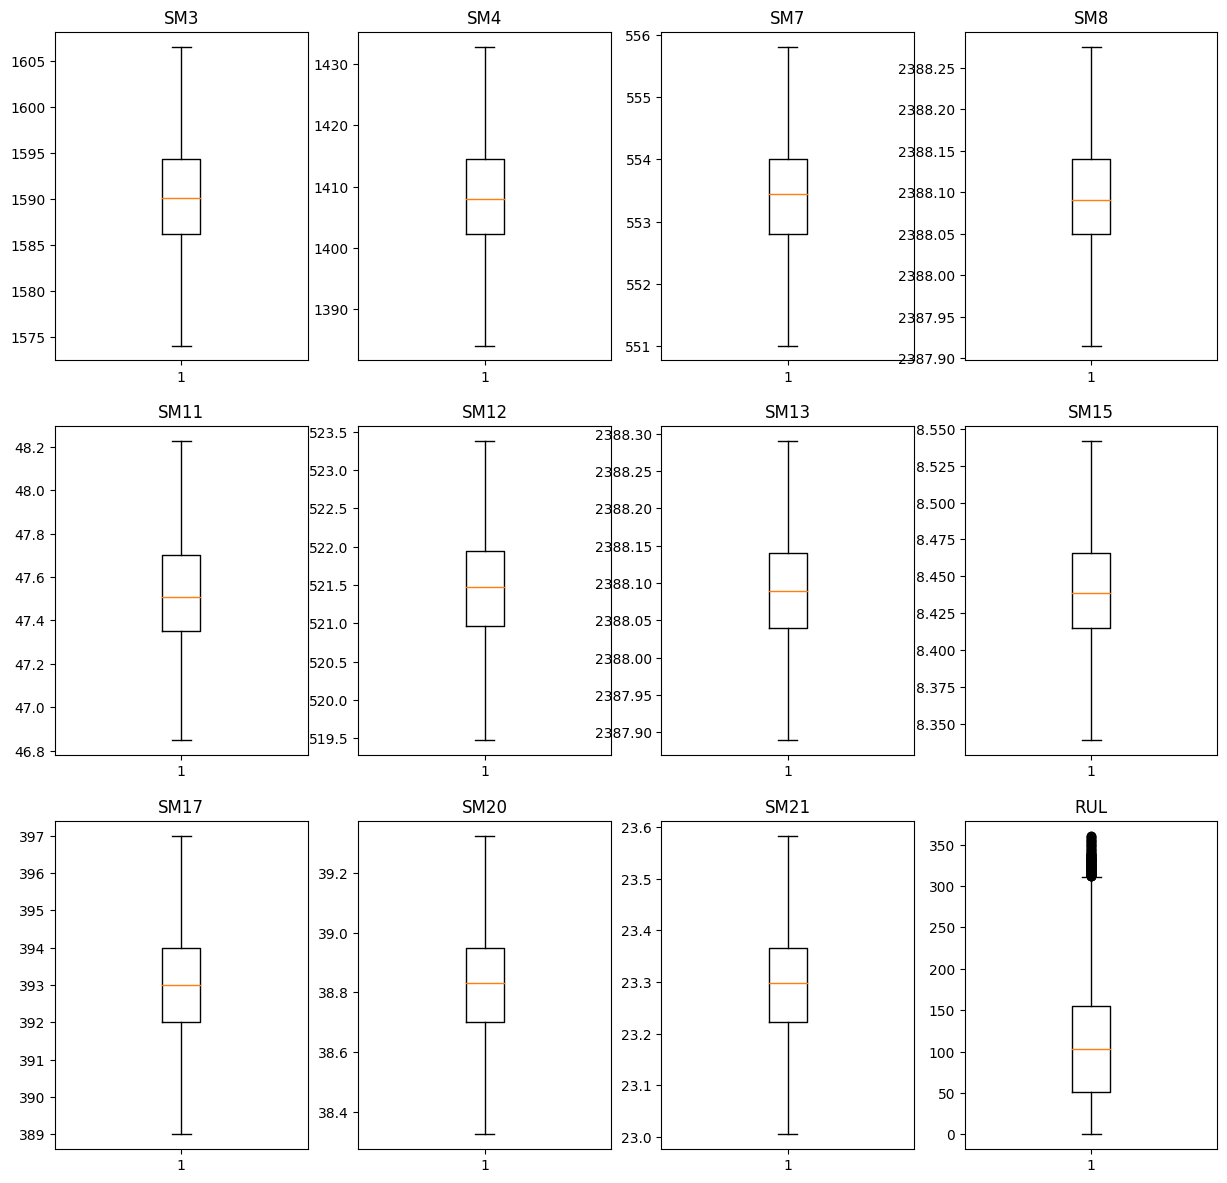

In [7]:
plt.figure(figsize = (15, 35))
for i in range(1, 13):
    plt.subplot(7,4, i)
    plt.boxplot(df.iloc[:, i+1])
    plt.title(df.columns[i+1])
plt.show()

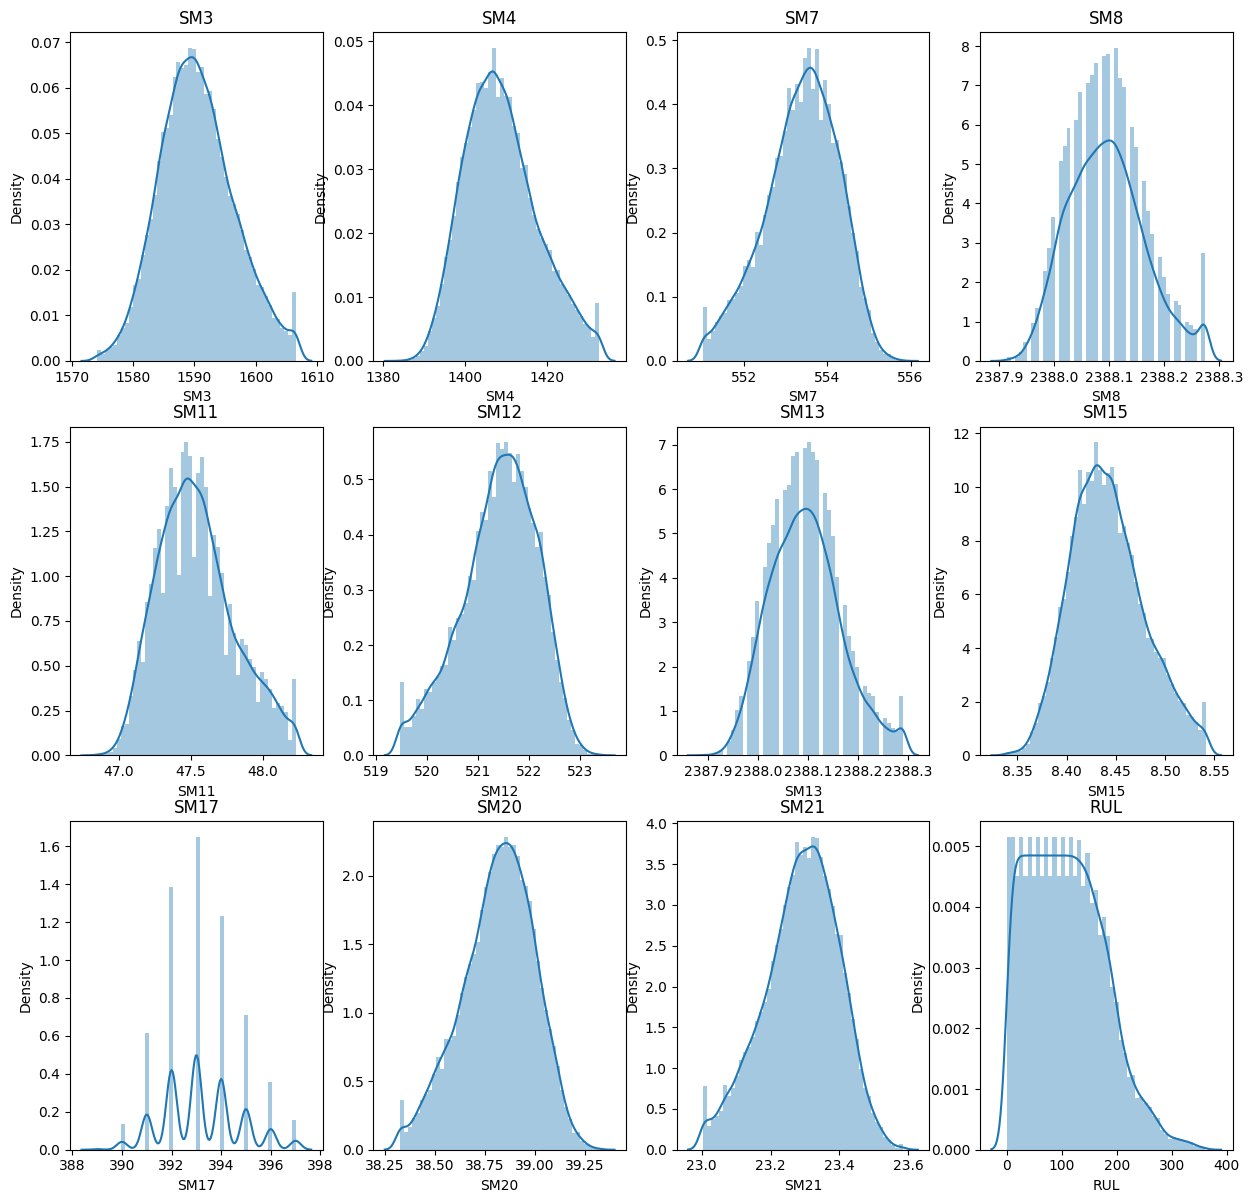

In [8]:
plt.figure(figsize = (15, 35))
for i in range(1, 13):
    plt.subplot(7,4, i)
    sns.distplot(df.iloc[:, i+1])
    plt.title(df.columns[i+1])
plt.show()

#### Splitting the dataset

In [9]:
# splitting the dataset into features and target
X = df.drop(["RUL"], axis=1)
y = df["RUL"]

In [10]:
# splitting the features and target into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_train.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 13)
X_test shape :  (16504, 13)
y_train shape :  (16504,)
y_test shape :  (4127,)


#### Feature Scaling

In [12]:
# using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[-1.24101845, -0.36816003,  0.04890336, ...,  0.5098432 ,
         0.30146004,  0.38192256],
       [ 0.09864142, -0.89054435,  0.5287991 , ..., -2.08801173,
         0.13513726,  0.35128341],
       [ 0.14232598, -0.54898538, -1.83137072, ..., -0.13962054,
         0.96675116, -0.16215444],
       ...,
       [-0.39645027, -0.36816003,  1.69987572, ..., -0.78908427,
        -0.36383108,  0.62425037],
       [-1.38663365, -1.5133872 , -2.04756948, ..., -0.13962054,
         1.41027858,  0.78394533],
       [-0.97891108, -1.03118629,  0.01123237, ..., -1.438548  ,
         1.90924692,  1.08940836]])

#### Simple Modeling

##### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_lr = lr_model.predict(X_test_scaled)

In [39]:
# evaluating the model
from sklearn.metrics import  mean_squared_error,r2_score

print(f"RMSE on train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print(f"RMSE on test: ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

RMSE on train:  40.78210379673454
RMSE on test:  39.78896592614632


##### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

dt_model=DecisionTreeRegressor()
dt_model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [35]:
y_pred_train_dt = dt_model.predict(X_train)
y_pred_dt = dt_model.predict(X_test)

In [40]:
print(f"RMSE on train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_dt)))
print(f"RMSE on test: ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

RMSE on train:  0.0
RMSE on test:  53.372574359161796


##### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

In [43]:
print(f"RMSE on train: ", np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print(f"RMSE on test: ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

RMSE on train:  14.2252702102467
RMSE on test:  37.44439509670284


#### Feature selection



<AxesSubplot: >

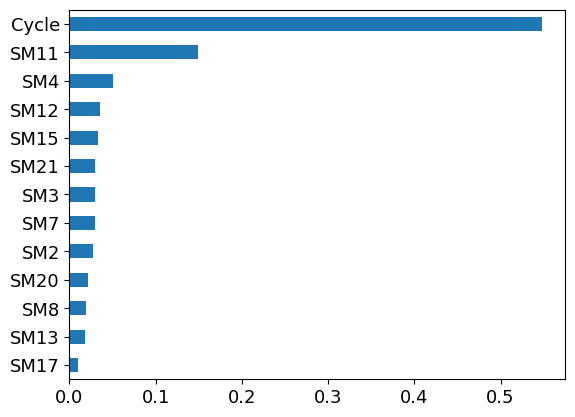

In [49]:
# finding the feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.Series(feature_importances, index=X.columns)
importance_df.nsmallest(13).plot(kind='barh', fontsize=13)

In [54]:
# forward feature selection
feature_importance_df = X[["Cycle", "SM11", "SM4", "SM12", "SM15", "SM21", "SM3", "SM7", "SM2", "SM20", "SM8", "SM13", "SM17"]]

In [55]:
feature_importance_df

,Cycle,SM11,SM4,SM12,SM15,SM21,SM3,SM7,SM2,SM20,SM8,SM13,SM17
0,1.0,47.470,1400.6000,521.660,8.41950,23.4190,1589.70,554.36,641.82,39.060,2388.06,2388.02,392.0
1,2.0,47.490,1403.1400,522.280,8.43180,23.4236,1591.82,553.75,642.15,39.000,2388.04,2388.07,392.0
2,3.0,47.270,1404.2000,522.420,8.41780,23.3442,1587.99,554.26,642.35,38.950,2388.08,2388.03,390.0
3,4.0,47.130,1401.8700,522.860,8.36820,23.3739,1582.79,554.45,642.35,38.880,2388.11,2388.08,392.0
4,5.0,47.280,1406.2200,522.190,8.42940,23.4044,1582.85,554.00,642.37,38.900,2388.06,2388.04,393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196.0,48.070,1428.6300,519.490,8.49560,23.0043,1597.98,551.43,643.49,38.490,2388.19,2388.26,397.0
20627,197.0,48.040,1432.8475,519.680,8.51390,23.1594,1604.50,551.01,643.54,38.325,2388.23,2388.22,395.0
20628,198.0,48.090,1428.1800,520.010,8.54165,23.0043,1602.46,551.01,643.42,38.440,2388.24,2388.24,397.0
20629,199.0,48.225,1426.5300,519.670,8.53890,23.0640,1605.26,551.01,643.23,38.325,2388.25,2388.23,395.0


In [60]:
number_of_features=[]
test_rmse=[]
train_rmse=[]

for i in range(1,13):
    
    number_of_features.append(i)
    
    features_df = feature_importance_df.iloc[:, 0:i]
    target_df = X.iloc[:,12]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
    
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    
    print('Total Features used:', i)
    
    y_pred = rf_regressor.predict(X_test)
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print('RMSE on test data:', np.sqrt(mean_squared_error(y_test, y_pred)))
    
    y_pred_train = rf_regressor.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('RMSE on training data:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
                      
    print("\n")

Total Features used: 1
RMSE on test data: 50.88409547043117
RMSE on training data: 12.545262317325959


Total Features used: 2
RMSE on test data: 50.957267671726356
RMSE on training data: 12.604168524361267


Total Features used: 3
RMSE on test data: 50.91422280881669
RMSE on training data: 12.691753460002339


Total Features used: 4
RMSE on test data: 50.91905000516645
RMSE on training data: 12.525572303271373


Total Features used: 5
RMSE on test data: 50.82329978458165
RMSE on training data: 12.606107533018593


Total Features used: 6
RMSE on test data: 50.74393606144
RMSE on training data: 12.570638922910751


Total Features used: 7
RMSE on test data: 50.77911163089383
RMSE on training data: 12.59060420516389


Total Features used: 8
RMSE on test data: 50.85942134996532
RMSE on training data: 12.590739400449216


Total Features used: 9
RMSE on test data: 50.967189586958995
RMSE on training data: 12.631925400979796


Total Features used: 10
RMSE on test data: 51.035825696337135
RMSE

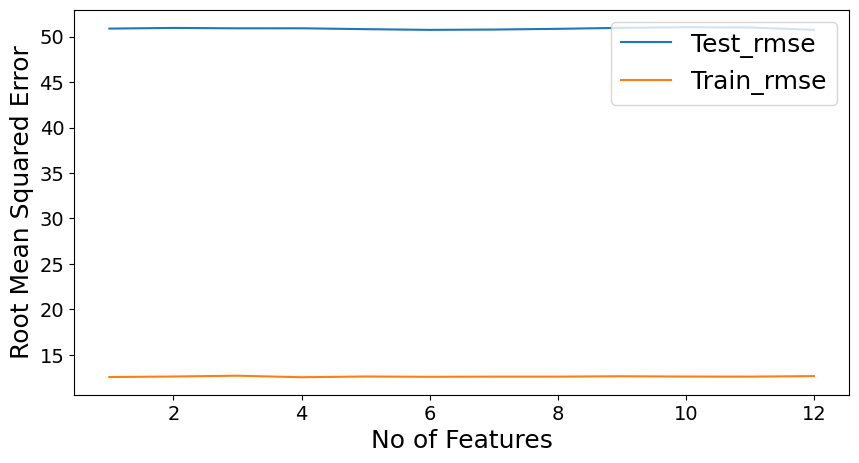

In [62]:
plt.figure(figsize=(10,5))
plt.plot(number_of_features, test_rmse)
plt.plot(number_of_features, train_rmse)
plt.xlabel("No of Features", fontsize=18)
plt.ylabel("Root Mean Squared Error", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Test_rmse", "Train_rmse"], loc="upper right", prop={'size':18})